# Features Time Series Generation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import tikzplotlib
import random
import ast
import nltk
from lyrics_stats import lyrics_statistics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib

In [2]:
sns.set_theme(context='paper', style='white', palette='deep')

In [3]:
df = pd.read_csv('../data/evaluation/lyrics_eval.csv')

In [4]:
df.head()

,index,lyrics,genre,id,similar_lyrics,random_lyrics
0,14308,"[""Make yaself, Don't break yaself"", ""Make yase...",pop,14308,"['Make Problems, Then Let Them', 'Make peace, ...","[""We've been living in a fantasy"", ""I said we'..."
1,36771,"['You will always be my baby', ""There's a thou...",pop,36771,"['You shall long be my baby', ""There's a thous...","['I still see your coat hangin on the door', '..."
2,33221,"['Hard to find a way to get through', ""It's a ...",pop,33221,"['Hard times find another way to cut through',...","['relaxin maxin to the maximum', 'to tracks a ..."
3,31036,"[""We're boarding the night train"", ""We're bore...",pop,31036,"[""We're behind the first train"", ""We're bored ...","[""Early mornin' wake up"", 'Gently with the Car..."
4,10925,"['Come come baby', 'I can see you wanna touch ...",pop,10925,"['Come come come', 'I wanna see people wanna t...",['I hear the click-clack of your feet on the s...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           150 non-null    int64 
 1   lyrics          150 non-null    object
 2   genre           150 non-null    object
 3   id              150 non-null    int64 
 4   similar_lyrics  150 non-null    object
 5   random_lyrics   150 non-null    object
dtypes: int64(2), object(4)
memory usage: 7.2+ KB


In [6]:
df['lyrics'] = list(map(lambda x: ast.literal_eval(x), df['lyrics']))
df['similar_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['similar_lyrics']))
df['random_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['random_lyrics']))

In [7]:
random.choice(df['lyrics'])

['I love my chick ',
 'I love my chick ',
 'I love my chick ',
 'I love my chick ',
 'I love my chick ',
 'I love my chick ',
 'My lady never lets me down',
 "That's why I never let her go",
 'She always here to lift me up',
 'When I fall down and hit the floor',
 'My baby so amazing',
 'Let me sit back and count the ways',
 '1 - She the shit',
 '2 - She legit',
 '3 - And she can get',
 'I love my chick',
 'I love my lady yup yup',
 'I love my chick ',
 'I love my lady yup yup',
 'I love my chick ',
 'I love my lady yup yup',
 'I love my chick ',
 'I love my chick and she can get',
 'I love my baby yup yup',
 'I love my boy ',
 'I love my baby yup yup',
 'I love my boy ',
 'I love my baby ',
 'I love my baby ',
 'I love my baby he bring me joy',
 'I love my girl cause she knows the shit',
 "She acting kinda I'll but she aint scared of the dick",
 'Got her on tape but though she act kinda rude',
 'Bet she know my money gone',
 'She spent a do on a dude',
 'Real life chicken wanna mess w

## Lyrics features

In [8]:
toy_lyrics = pd.read_csv('../data/toy-lyrics/toy_lyr.csv', sep='\t')
toy_lyrics.head()

,lyrics,part
0,"Yo, listen up, I got a story to tell",intro
1,"Gonna take you on a journey, can you feel?",intro
2,"I was born in the ghetto, raised in the streets",verse
3,"Never had much, but I made it with heat",verse
4,"I fought for my dreams, never gave up the fight",verse


In [9]:
eg_lyrics = list(toy_lyrics['lyrics'])
eg_lyrics

['Yo, listen up, I got a story to tell',
 'Gonna take you on a journey, can you feel?',
 'I was born in the ghetto, raised in the streets',
 'Never had much, but I made it with heat',
 'I fought for my dreams, never gave up the fight',
 "Now I'm living my best life, shining bright",
 "Yeah, yeah, I'm the one, hear my voice",
 'got the fire, gonna make some noise',
 "I'm the master of the game, that's a fact",
 'got the skills, never looking back',
 "I've been through the ups and the downs, the twists and the turns",
 'But I always keep my head up, never letting my fire burn',
 "I've got the power, got the drive, never gonna stop",
 'Gonna make my mark, till the beat drops',
 "Yeah, yeah, I'm the one, hear my voice",
 'got the fire, gonna make some noise',
 "I'm the master of the game, that's a fact",
 'got the skills, never looking back',
 'So listen up, hear what I say',
 "I'm the king of the game, leading the way",
 "With my rhymes, and my flows, I'm unstoppable",
 "Gonna take the wo

In [10]:
lyrics_stats = pd.DataFrame(lyrics_statistics(eg_lyrics))
lyrics_stats.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,VERB_count,NOUN_count,ADJ_count,ADV_count,INTJ_count
0,9,0,7,2.888889,5.84,0.045455,1.0,4.000000,9.0,3,2,0,0,0
1,9,0,8,3.200000,5.84,0.045455,0.9,2.600000,9.0,3,2,0,0,0
2,10,0,9,3.700000,8.87,0.045455,0.8,7.200000,14.0,3,2,0,0,0
3,9,0,8,3.333333,0.45,0.045455,1.0,3.333333,8.0,2,1,1,1,0
4,10,0,9,3.700000,5.71,0.045455,1.0,6.300000,11.0,2,2,0,1,0


In [11]:
lyrics_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   verse_length                22 non-null     int64  
 1   monosyl_words_count         22 non-null     int64  
 2   polysyl_words_count         22 non-null     int64  
 3   avg_token_length            22 non-null     float64
 4   readability_score           22 non-null     float64
 5   normalized_verse_frequency  22 non-null     float64
 6   verse_ttr                   22 non-null     float64
 7   avg_token_frequency         22 non-null     float64
 8   avg_phoneme_frequency       22 non-null     float64
 9   VERB_count                  22 non-null     int64  
 10  NOUN_count                  22 non-null     int64  
 11  ADJ_count                   22 non-null     int64  
 12  ADV_count                   22 non-null     int64  
 13  INTJ_count                  22 non-nu

In [12]:
lyrics_stats.describe()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,VERB_count,NOUN_count,ADJ_count,ADV_count,INTJ_count
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,8.636364,0.090909,7.590909,3.604831,5.384545,0.061983,0.923078,6.442929,9.318182,2.272727,2.409091,0.181818,0.454545,0.181818
std,1.705606,0.294245,1.816829,0.507280,3.372839,0.022380,0.091405,2.213564,4.291590,0.631085,1.098011,0.394771,0.738549,0.588490
min,6.000000,0.000000,4.000000,2.888889,0.350000,0.045455,0.692308,2.600000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,7.000000,3.250000,1.877500,0.045455,0.875000,4.590278,7.000000,2.000000,2.000000,0.000000,0.000000,0.000000
50%,8.500000,0.000000,8.000000,3.472222,5.925000,0.045455,0.958333,6.625000,9.000000,2.000000,2.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,8.000000,3.751923,7.980000,0.090909,1.000000,7.875000,11.000000,2.750000,3.000000,0.000000,1.000000,0.000000
max,13.000000,1.000000,13.000000,4.666667,9.950000,0.090909,1.000000,10.666667,22.000000,4.000000,4.000000,1.000000,3.000000,2.000000


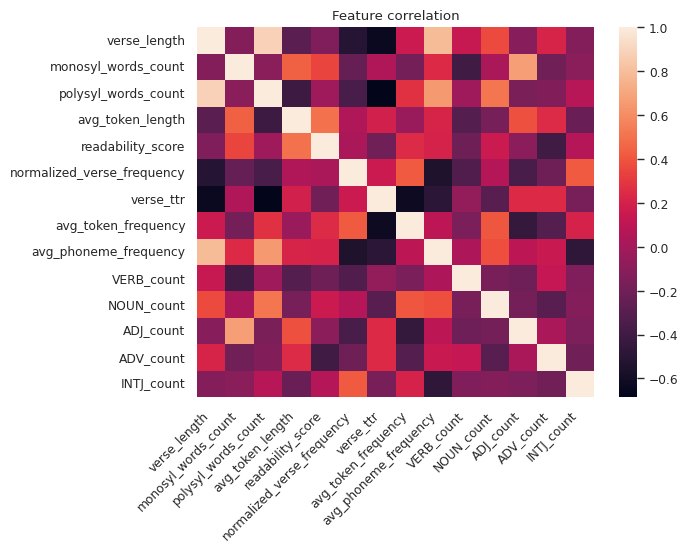

In [13]:
fig, ax = plt.subplots()
ax = sns.heatmap(lyrics_stats.corr())
ax.set_title('Feature correlation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
tikzplotlib.save('../tikz/feature_correlation.tex')

## Time Series

In [14]:
eg_multi_ts = pd.DataFrame(lyrics_stats, columns=lyrics_stats.columns)
eg_multi_ts.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,VERB_count,NOUN_count,ADJ_count,ADV_count,INTJ_count
0,9,0,7,2.888889,5.84,0.045455,1.0,4.000000,9.0,3,2,0,0,0
1,9,0,8,3.200000,5.84,0.045455,0.9,2.600000,9.0,3,2,0,0,0
2,10,0,9,3.700000,8.87,0.045455,0.8,7.200000,14.0,3,2,0,0,0
3,9,0,8,3.333333,0.45,0.045455,1.0,3.333333,8.0,2,1,1,1,0
4,10,0,9,3.700000,5.71,0.045455,1.0,6.300000,11.0,2,2,0,1,0


In [15]:
ss = StandardScaler()
eg_scl_multi_ts = pd.DataFrame(ss.fit_transform(eg_multi_ts),columns = eg_multi_ts.columns)
eg_scl_multi_ts.head()

,verse_length,monosyl_words_count,polysyl_words_count,avg_token_length,readability_score,normalized_verse_frequency,verse_ttr,avg_token_frequency,avg_phoneme_frequency,VERB_count,NOUN_count,ADJ_count,ADV_count,INTJ_count
0,0.218218,-0.316228,-0.332896,-1.444547,0.138214,-0.755929,0.861360,-1.129589,-0.075885,1.179536,-0.381342,-0.471405,-0.629941,-0.316228
1,0.218218,-0.316228,0.230466,-0.816822,0.138214,-0.755929,-0.258421,-1.776936,-0.075885,1.179536,-0.381342,-0.471405,-0.629941,-0.316228
2,0.818317,-0.316228,0.793829,0.192021,1.057707,-0.755929,-1.378201,0.350063,1.116601,1.179536,-0.381342,-0.471405,-0.629941,-0.316228
3,0.218218,-0.316228,0.230466,-0.547797,-1.497453,-0.755929,0.861360,-1.437850,-0.314383,-0.442326,-1.313512,2.121320,0.755929,-0.316228
4,0.818317,-0.316228,0.793829,0.192021,0.098763,-0.755929,0.861360,-0.066089,0.401109,-0.442326,-0.381342,-0.471405,0.755929,-0.316228


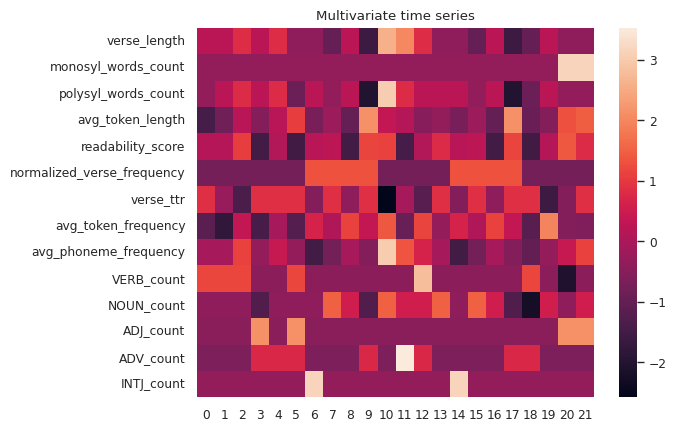

In [16]:
fig, ax = plt.subplots()
ax = sns.heatmap(eg_scl_multi_ts.T)
ax.set_title('Multivariate time series')
tikzplotlib.save('../tikz/features_multi_ts.tex')

In [17]:
parts_of_lyrics = list(toy_lyrics['part'])
color_map = {}
for idx, part_of_lyrics in enumerate(list(dict.fromkeys(parts_of_lyrics))):    
    # Map color excluding first color of the palette 
    color_map[part_of_lyrics] = sns.color_palette()[idx+1]

In [18]:
eg_uni_ts = np.mean(eg_scl_multi_ts.values, axis=1)

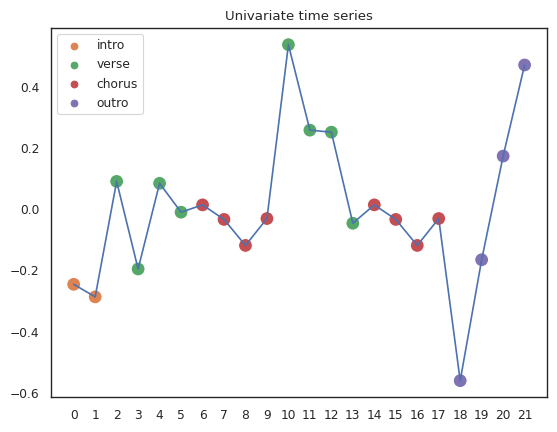

In [19]:
fig, ax = plt.subplots()
ax = plt.plot(eg_uni_ts)
# Draw dots representing parts of the lyrics
ax =  sns.scatterplot(y = eg_uni_ts,
                      x = range(len(eg_uni_ts)),
                      hue=parts_of_lyrics, s=100,
                      palette=color_map)

ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uni_ts)))

plt.legend(loc='upper left')
tikzplotlib.save('../tikz/features_uni_ts_avg.tex')


In [20]:
eg_uni_ts = np.max(eg_scl_multi_ts.values, axis=1)

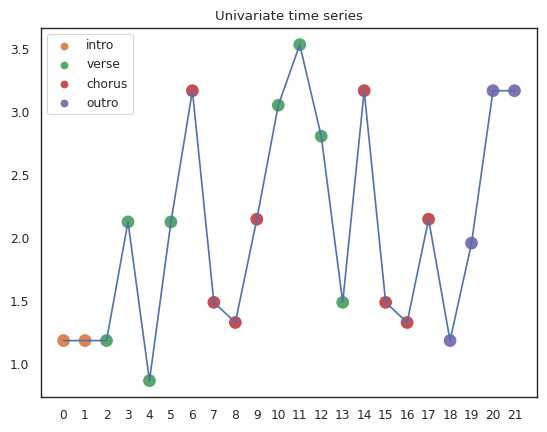

In [21]:
fig, ax = plt.subplots()
ax = plt.plot(eg_uni_ts)
# Draw dots representing parts of the lyrics
ax =  sns.scatterplot(y = eg_uni_ts,
                      x = range(len(eg_uni_ts)),
                      hue=parts_of_lyrics, s=100,
                      palette=color_map)

ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uni_ts)))

plt.legend(loc='upper left')
tikzplotlib.save('../tikz/features_uni_ts_max.tex')


In [22]:
pca = PCA(n_components=1, random_state=42)

pca_output = pca.fit_transform(eg_scl_multi_ts.values)

eg_uni_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

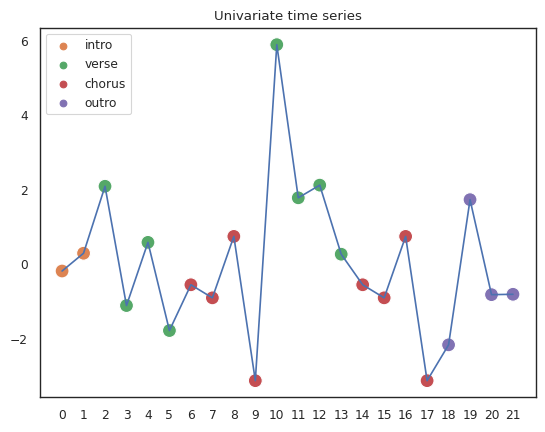

In [23]:
fig, ax = plt.subplots()
ax = plt.plot(eg_uni_ts)
# Draw dots representing parts of the lyrics
ax =  sns.scatterplot(y = eg_uni_ts,
                      x = range(len(eg_uni_ts)),
                      hue=parts_of_lyrics, s=100,
                      palette=color_map)

ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uni_ts)))

plt.legend(loc='upper left')
tikzplotlib.save('../tikz/features_uni_ts_pca.tex')


In [24]:
global_scaler = joblib.load('../models/features_scaler.pkl')
global_pca = joblib.load('../models/features_pca.pkl')

In [25]:
pca_output = global_pca.transform(
    global_scaler.transform(eg_multi_ts.values))

eg_unigpca_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

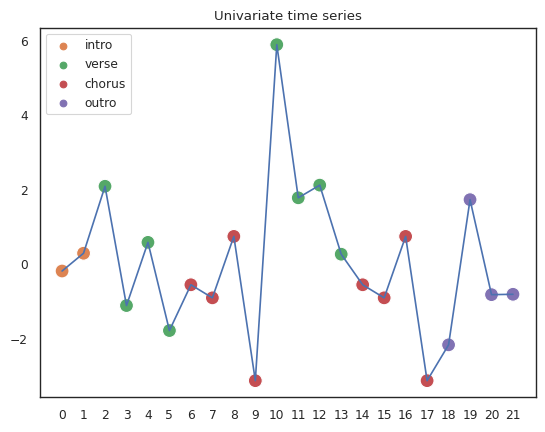

In [26]:
fig, ax = plt.subplots()
ax = plt.plot(eg_uni_ts)
# Draw dots representing parts of the lyrics
ax =  sns.scatterplot(y = eg_uni_ts,
                      x = range(len(eg_uni_ts)),
                      hue=parts_of_lyrics, s=100,
                      palette=color_map)

ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uni_ts)))

plt.legend(loc='upper left')
tikzplotlib.save('../tikz/features_uni_ts_gpca.tex')


In [27]:
def generate_uni_ts(multi_ts, normalize=False, pooling_method='avg', scaler=None, pca=None):
    """
    Convert a multi-variate time series represented as a numpy array into a uni-variate time series.
    
    Parameters
    ----------
    multi_ts : numpy array
        A 2D array representing the multi-variate time series with shape (n_samples, n_features)
    normalize: bool, optional
        Whether to normalize the input data using standard scaler. Default is False.
    pooling_method : str, optional
        The method to use for pooling the multi-variate time series into a uni-variate time series.
        Must be one of 'avg', 'max', or 'pca'. Default is 'avg'.
    scaler: object, optional
        Scaler object to use to normalize the data. Default is None.
    pca: object, optional
        PCA object to use to reduce the data. Default is None.
        
    Returns
    -------
    uni_ts : numpy array
        A 1D array representing the uni-variate time series with shape (n_samples,)
        
    Raises
    ------
    ValueError
        If an invalid value is passed for the pooling_method
    """
    if normalize:
        if scaler is None:
            scaler = StandardScaler()
            multi_ts = scaler.fit_transform(multi_ts)
        else:
            multi_ts = scaler.transform(multi_ts)
    if pooling_method=='avg':            
        uni_ts = np.mean(multi_ts, axis=1)            
    elif pooling_method=='max':            
        uni_ts = np.max(multi_ts, axis=1)            
    elif pooling_method=='pca':                
        if pca is None:            
            pca = PCA(n_components=1, random_state=42)
            pca_output = pca.fit_transform(multi_ts)
        else: 
            pca_output = pca.transform(multi_ts)       
        uni_ts = np.array(list(
            map(lambda unique_element: unique_element[0] , pca_output)))                                     
    else:
        raise ValueError("Invalid pooling_method passed. Please use either 'avg', 'max' or 'pca'.")        
    return uni_ts

In [28]:
methods = [{'pooling_method': 'avg', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'avg'},
           {'pooling_method': 'max', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'max'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'pca'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': global_scaler, 'pca': global_pca, 'filename': 'gpca'},
           ]

for method in methods:        
    ts_data = {}
    for lyrics_type in ['lyrics', 'similar_lyrics', 'random_lyrics']:        
        ts_data[lyrics_type] = []
        for lyr in df[lyrics_type]:
            multi_ts = pd.DataFrame(lyrics_statistics(lyr))
            uni_ts = generate_uni_ts(multi_ts.values, 
                                     normalize=method['normalize'], 
                                     pooling_method=method['pooling_method'],
                                     scaler=method['scaler'],
                                     pca=method['pca'])
            uni_ts = list(uni_ts)
            ts_data[lyrics_type].append(uni_ts)
    ts_data = pd.DataFrame(ts_data)
    filename = f'../data/evaluation/time-series/features_{method["filename"]}_ts.csv'
    ts_data.to_csv(filename, index=False)

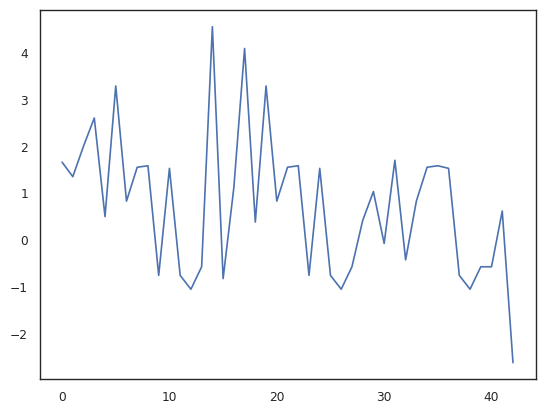

In [29]:
plt.plot(random.choice(ts_data['lyrics']))